In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from importlib import reload

from missing_data_imputation import *

### MeanMedianImputer

In [10]:
data = pd.read_csv('titanic.csv')
median_imputer = MeanMedianImputer(imputation_method='mean')
median_imputer.fit(data)

MeanMedianImputer(imputation_method='mean')

In [11]:
median_imputer.imputer_dict_

{'Age': 29.69911764705882,
 'Fare': 32.2042079685746,
 'Parch': 0.38159371492704824,
 'PassengerId': 446.0,
 'Pclass': 2.308641975308642,
 'SibSp': 0.52300785634118963,
 'Survived': 0.38383838383838381}

In [12]:
data[['Age', 'Fare']].isnull().sum()

Age     177
Fare      0
dtype: int64

In [13]:
test = median_imputer.transform(data)
test[['Age', 'Fare']].isnull().sum()

Age     0
Fare    0
dtype: int64

In [14]:
data[['Age', 'Fare']].isnull().sum()

Age     177
Fare      0
dtype: int64

In [15]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


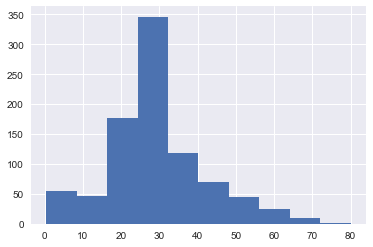

In [16]:
test.Age.hist()

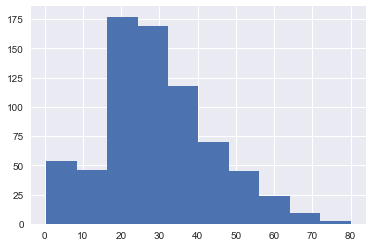

In [17]:
data.Age.hist()

### Random Sample Imputer

In [18]:
data = pd.read_csv('titanic.csv')
random_imputer = RandomSampleImputer()
random_imputer.fit(data)

RandomSampleImputer()

In [19]:
random_imputer.X_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
test3 = random_imputer.transform(data, random_state=0)
test3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

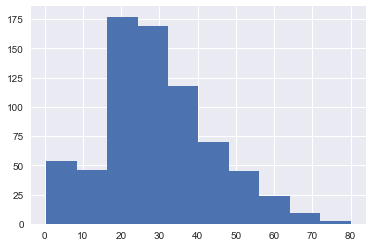

In [22]:
data.Age.hist()

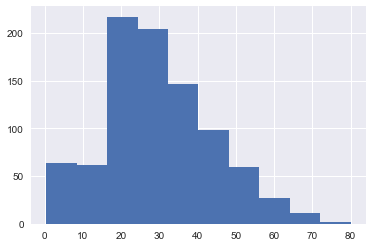

In [23]:
test3.Age.hist()

In [24]:
data.Age.mean(), test3.Age.mean()

(29.69911764705882, 29.85597081930415)

### End of tail imputer

In [25]:
data = pd.read_csv('titanic.csv')
endtail_imputer = EndTailImputer(distribution='gaussian', tail='left', fold=1.5)
endtail_imputer.fit(data)

EndTailImputer(distribution='gaussian', fold=1.5, tail='left')

In [26]:
endtail_imputer.imputer_dict_

{'Age': 7.9093716485577552,
 'Fare': -42.335934927196753,
 'Parch': -0.82749211676788548,
 'PassengerId': 59.969236977154878,
 'Pclass': 1.054535113843065,
 'SibSp': -1.1311072920989518,
 'Survived': -0.34605029755890387}

In [27]:
test = endtail_imputer.transform(data)
test[['Age', 'Fare']].isnull().sum()

Age     0
Fare    0
dtype: int64

In [28]:
data[['Age', 'Fare']].isnull().sum()

Age     177
Fare      0
dtype: int64

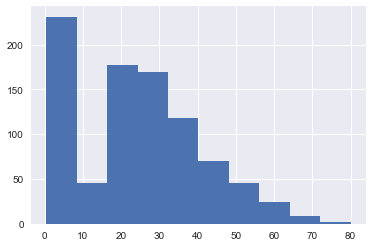

In [29]:
test.Age.hist()

### Additional variable indicator

In [30]:
data = pd.read_csv('titanic.csv')
na_captures = na_capturer()
na_captures.fit(data)

na_capturer(tol=0.05)

In [31]:
na_captures.variables_

['Age', 'Cabin']

In [32]:
test = na_captures.transform(data)
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na,Cabin_na
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


### Categorical imputer 

In [33]:
data = pd.read_csv('titanic.csv')
cat_imputer = CategoricalImputer()
cat_imputer.fit(data)

CategoricalImputer(tol=0.05)

In [34]:
cat_imputer.variables_

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [35]:
cat_imputer.imputer_dict_

{'Cabin': 'Missing',
 'Embarked': 'S',
 'Name': 'Missing',
 'Sex': 'male',
 'Ticket': 'Missing'}

In [36]:
data.Sex.isnull().mean()

0.0

In [5]:
test = cat_imputer.transform(data)
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

### Fixed number imputer

In [37]:
data = pd.read_csv('titanic.csv')
fixed_imputer = ArbitraryImputer()
fixed_imputer.fit(data, imputation_dictionary={'Age':2, 'Cabin':'Missing'})

ArbitraryImputer()

In [38]:
fixed_imputer.imputer_dict_

{'Age': 2, 'Cabin': 'Missing'}

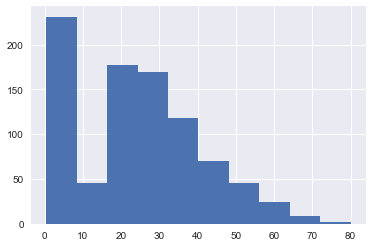

In [39]:
test = fixed_imputer.transform(data)
test.Age.hist()

In [ ]:
[la = 'yes' if x in [1,2] else la = 'No'